In [14]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from  sklearn.ensemble import GradientBoostingRegressor

In [2]:
cwd=Path.cwd()
cwd

WindowsPath('C:/Users/Wayne Linn/Desktop/Y2S2/IE4211/Project_Submission/Base_Model')

In [3]:
p = cwd.parent

In [4]:
X=pd.read_csv(f"{p}\\Preprocessing\\Train_data_base.csv",index_col=0)
Y=pd.read_csv(f"{p}\\Preprocessing\\Y_train.csv",index_col=0)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state =30)

In [6]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
MSE(lr.predict(X_test),Y_test)

2.239589137170673e+27

In [7]:
from sklearn.model_selection import GridSearchCV
score_metric = 'neg_mean_squared_error'
reg = GridSearchCV(LinearRegression(),
                   {},
                cv=5,
                scoring=score_metric,
                  n_jobs=-1)
reg.fit(X,Y)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             scoring='neg_mean_squared_error')

In [8]:
df = pd.DataFrame(reg.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027325,0.001492,0.00399,0.000632,{},-468.440335,-7.627892e+25,-9.264963e+27,-1.725579e+26,-6.102041e+26,-2.024801e+27,3.626249e+27,1


In [9]:
residue = Y_test-lr.predict(X_test)

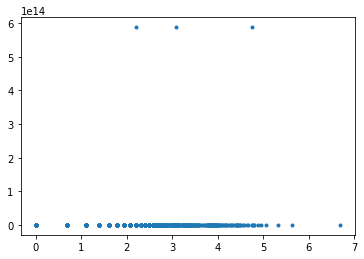

In [10]:
plt.plot(np.log(Y_test),residue,".")

In [15]:
param_grid = {
    "learning_rate":[0.005*i for i in range(1,10)],
    "n_estimators": [10**i for i in range(1,3)],
    "min_samples_split":[0.01*i for i in range(1,3)],
    "max_features":["auto", "sqrt", "log2"]
}

reg = GridSearchCV(GradientBoostingRegressor(random_state=42),
                   param_grid,
                cv=5,
                scoring=score_metric,
                  n_jobs=-1)
reg.fit(X,Y)

C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.015, 0.02, 0.025,
                                           0.03, 0.035, 0.04, 0.045],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0.01, 0.02],
                         'n_estimators': [10, 100]},
             scoring='neg_mean_squared_error')

In [16]:
print("Best parameter (CV score=%0.3f):" % reg.best_score_)
print(reg.best_params_)

Best parameter (CV score=-564.306):
{'learning_rate': 0.04, 'max_features': 'auto', 'min_samples_split': 0.02, 'n_estimators': 100}
